## Junior Data Analyst Interview Task

Construct a model that produces the following calculations and charts. You should ensure that your model contains appropriate self-checks and that you have performed reasonableness checks at each stage of your calculations.

(i)	Carry out checks on the data provided to confirm that the data is complete and fit for use. This should include:

•	creating a graph showing the average solar electricity generation and average electricity usage for each hour in a  day, i.e. the average over all amounts for 1 am, and each subsequent hour within a 24-hour period.
•	investigating any significant outliers.
•	making any corrections that are needed.


(ii)	Calculate, for each hour in 2020, the amount of electricity that needed to be bought from the electricity provider (measured in kWh and subject to a minimum of zero).


(iii)	Calculate, for each hour in 2020, the excess solar electricity generated over electricity used (measured in kWh and subject to a minimum of zero).

(iv)	Model the cumulative battery charge level (measured in kWh) for each hour over 2020, assuming a battery had already been installed.

The battery charge level should:

•   begin at zero at 1 January 2020 00:00.

•	allow for the increase or decrease in charge level depending on the hourly results of parts (ii) and (iii).

•	be subject to the cap on the maximum battery charge level.


(v)     Calculate the amount of electricity for each hour in 2020 that would have been bought from the electricity provider (measured in kWh and subject to a minimum of zero), assuming a battery had already been installed.	

(vi)	Calculate the saving over 2020 (in dollars ($), using 1 January 2022 electricity prices and ignoring discounting) from installing a battery compared to using the existing solar panels alone.	
 
(vii)	Tabulate the data appropriately and then produce a chart to illustrate, on a monthly basis for the calendar year and measured in kWh, the:

•	monthly solar generation.
•	monthly electricity usage.
•	monthly electricity purchased from the electricity provider (no battery).
•	monthly electricity purchased from the electricity provider (with battery).


In [1]:
import pandas as pd # responsible for dataframe management
import matplotlib.pyplot as plt # Responsible for data Visualisation
import numpy as np # Responsible for mathematical manipulation
import seaborn as sns # Responsible for data Visualisation

In [2]:
# Load the Dataset and inspect the first 5 rows.
df = pd.read_csv('Junior_Data_Analyst_Data_Provided.csv')
df.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
0,0,1/1/2020 0:00,0.0,1.509849
1,1,1/1/2020 1:00,0.0,1.411859
2,2,1/1/2020 2:00,0.0,1.023898
3,3,1/1/2020 3:00,0.0,0.642000
4,4,1/1/2020 4:00,0.0,0.960000


In [3]:
# Remove the time from the date/hour start since its a repetiotion of the hours column
df['Date']=[df['Date/hour start'][i].split(' ')[0] for i in range(len(df['Date/hour start']))]
df.drop(columns='Date/hour start', inplace= True, axis=1)
df

,Hour,Solar electricity generation (kWh),Electricity usage (kWh),Date
0,0,0.000,1.509849,1/1/2020
1,1,0.000,1.411859,1/1/2020
2,2,0.000,1.023898,1/1/2020
3,3,0.000,0.642000,1/1/2020
4,4,0.000,0.960000,1/1/2020
...,...,...,...,...
8755,19,0.012,4.395600,12/31/2020
8756,20,0.003,4.560600,12/31/2020
8757,21,0.000,2.022000,12/31/2020
8758,22,0.015,1.668000,12/31/2020


In [4]:
# Inspect the data type of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Hour                                8760 non-null   int64  
 1   Solar electricity generation (kWh)  8760 non-null   float64
 2   Electricity usage (kWh)             8760 non-null   float64
 3   Date                                8760 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 273.9+ KB


In [5]:
# Change the datatype for date to datetime and strip the time.
df['Date']=df['Date'].astype('datetime64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Hour                                8760 non-null   int64         
 1   Solar electricity generation (kWh)  8760 non-null   float64       
 2   Electricity usage (kWh)             8760 non-null   float64       
 3   Date                                8760 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 273.9 KB


In [6]:
df.head(15)

,Hour,Solar electricity generation (kWh),Electricity usage (kWh),Date
0,0,0.000,1.509849,2020-01-01
1,1,0.000,1.411859,2020-01-01
2,2,0.000,1.023898,2020-01-01
3,3,0.000,0.642000,2020-01-01
4,4,0.000,0.960000,2020-01-01
5,5,0.012,0.897000,2020-01-01
6,6,0.006,0.648000,2020-01-01
7,7,0.009,0.774000,2020-01-01
8,8,0.012,1.299000,2020-01-01
9,9,0.846,0.606000,2020-01-01


In [7]:
# Identify the size of the dataset and the number of null values
print (f'The Size of the dataset provided is {df.shape[0]} rows and {df.shape[1]} columns')
print(f'There are the following null values: \n\n{df.isnull().sum()}')

The Size of the dataset provided is 8760 rows and 4 columns
There are the following null values: 

Hour                                  0
Solar electricity generation (kWh)    0
Electricity usage (kWh)               0
Date                                  0
dtype: int64


In [8]:
df[['Solar electricity generation (kWh)','Electricity usage (kWh)']].describe()

,Solar electricity generation (kWh),Electricity usage (kWh)
count,8760.000000,8760.000000
mean,1.116750,2.067200
std,2.026098,4.668749
min,0.000000,-12.624000
25%,0.000000,0.300000
50%,0.024000,0.621000
75%,1.272750,1.686000
max,13.050000,61.102800


1. There seems to be a disturbance in the electricity usage since the lowest record shows a negative usage. Further Analysis are done to see the frequency of negative data.
2. The average consumption of electricity was higher than that of solar energy generated.

In [9]:
print(f'''The maximum electricity generated from solar is
      {np.divide(max(df['Electricity usage (kWh)']), max(df['Solar electricity generation (kWh)']))} times less than the maximum electricity load needed''')

The maximum electricity generated from solar is
      4.682206896551724 times less than the maximum electricity load needed


In [10]:
negative_electric_usage = df[df['Electricity usage (kWh)']<0].value_counts().sum()
print(f'The number of negative electic usages in 2020 are {negative_electric_usage}')

The number of negative electic usages in 2020 are 5


In [11]:
df[df['Electricity usage (kWh)']<0].value_counts()

Hour  Solar electricity generation (kWh)  Electricity usage (kWh)  Date      
8     0.717                               -1.9770                  2020-09-27    1
17    0.006                               -12.6240                 2020-01-01    1
      1.185                               -2.5140                  2020-05-30    1
21    0.006                               -2.1330                  2020-02-08    1
23    0.000                               -0.2175                  2020-02-08    1
dtype: int64

Since it is against logic from the definition of Electricity Usage to have negative usage, the negative values were
replaced with zero (0).


In [12]:
df['Electricity usage (kWh)']=df['Electricity usage (kWh)'].apply(lambda x: 0 if x < 0 else x)

In [13]:
#Inspect the new dataset to confirm the negative usages were changed to zero
negative_electric_usage = df[df['Electricity usage (kWh)']<0].value_counts().sum()
print(f'The number of negative electic usages in 2020 are {negative_electric_usage}')

The number of negative electic usages in 2020 are 0


In [14]:
df.describe()

,Hour,Solar electricity generation (kWh),Electricity usage (kWh)
count,8760.000000,8760.000000,8760.000000
mean,11.500000,1.116750,2.069422
std,6.922582,2.026098,4.665634
min,0.000000,0.000000,0.000000
25%,5.750000,0.000000,0.300000
50%,11.500000,0.024000,0.621000
75%,17.250000,1.272750,1.686000
max,23.000000,13.050000,61.102800


## Visualisation of the Data

Text(0.5, 1.0, 'Mean Solar Electricity Generation per Hour')

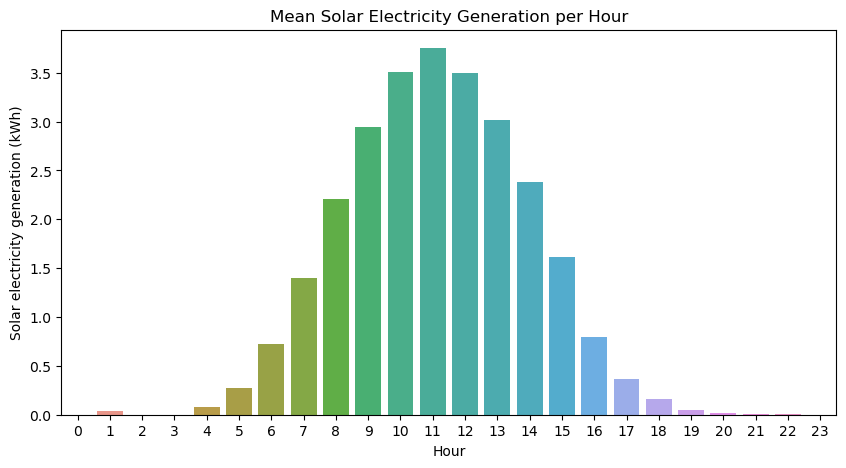

In [15]:
Ave_Solar_Gen=df['Solar electricity generation (kWh)'].groupby(df['Hour']).mean()
fig =plt.figure(figsize=(10,5))
sns.barplot(x='Hour',y=Ave_Solar_Gen, data=df)
plt.title('Mean Solar Electricity Generation per Hour')

In [16]:
df['Bought Electricity']= df['Electricity usage (kWh)']-df['Solar electricity generation (kWh)']
df['Bought Electricity']=df['Bought Electricity'].apply(lambda x: 0 if x<0 else x )

In [17]:
Average_Energy_bought = df['Bought Electricity'].groupby(df['Hour']).mean()
Average_Energy_bought

Hour
0     0.816471
1     0.400686
2     0.250623
3     0.407688
4     0.491866
5     0.477241
6     1.728090
7     1.307079
8     1.222389
9     1.063504
10    1.140247
11    1.050189
12    1.336111
13    0.918419
14    0.764745
15    0.929885
16    1.174471
17    2.243671
18    5.979427
19    6.008757
20    4.830945
21    2.729852
22    4.559416
23    1.098154
Name: Bought Electricity, dtype: float64

In [18]:
Ave_Elec_Used=df['Electricity usage (kWh)'].groupby(df['Hour']).mean()
Average_Energy_Excess = Ave_Solar_Gen - Ave_Elec_Used
for i in range(len(Average_Energy_Excess)):
    if (Average_Energy_Excess[i]<0):
        Average_Energy_Excess[i]=0
    else:
        Average_Energy_Excess[i]=Average_Energy_Excess[i]
Average_Energy_Excess

Hour
0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.401729
9     1.259959
10    1.696866
11    2.066490
12    1.387519
13    1.499852
14    1.131674
15    0.252699
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
dtype: float64

On average, between 8 AM and 3PM there was no energy purchased because the amount of solar generated electricity was enough to supply the load at that time.

The highest amount of energy purchased was at the evening hours between 6 Pm and 7 Pm.

Text(0.5, 1.0, 'Mean Electricity used per Hour')

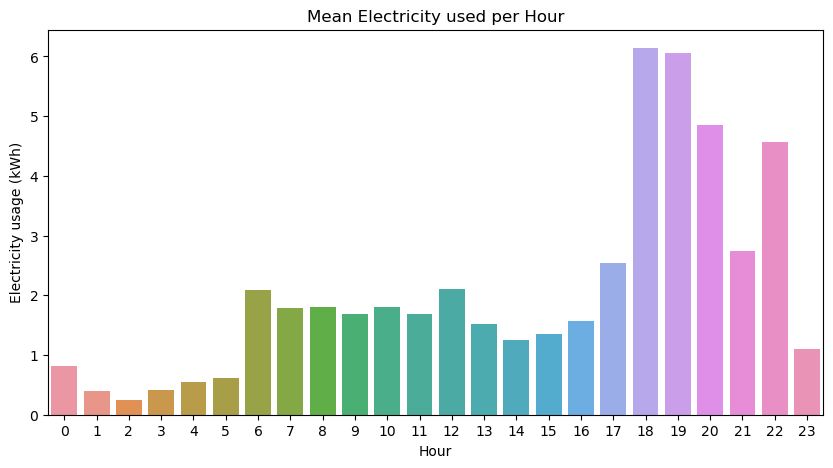

In [19]:
fig =plt.figure(figsize=(10,5))
sns.barplot(x='Hour',y=Ave_Elec_Used, data=df)
plt.title('Mean Electricity used per Hour')

We have the least load on electricity around 2 Am.
The highest load is between 6PM and 7PM, this coincides with the time we have the highest energy purchased. 

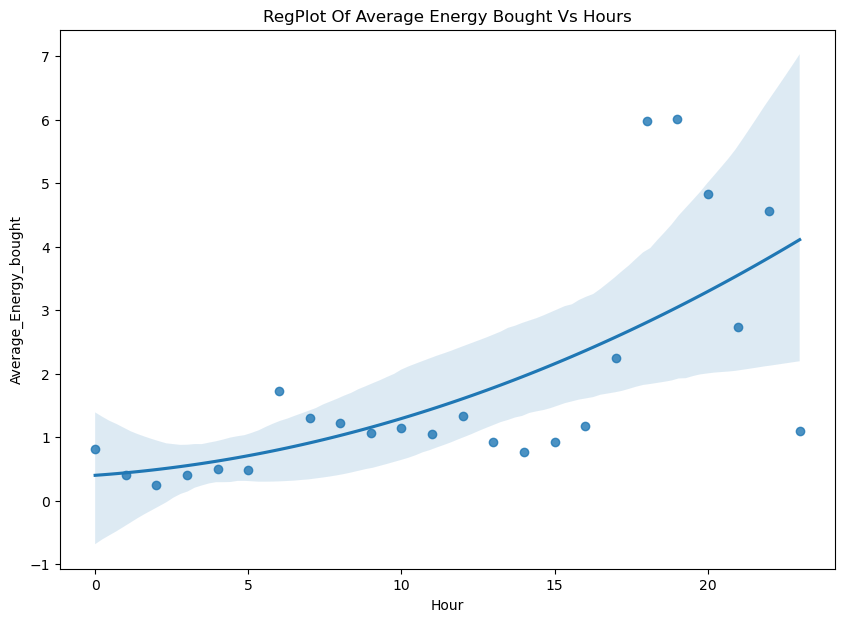

In [20]:
fig = plt.figure(figsize=(10,7))
sns.regplot(y=Average_Energy_bought,x=df['Hour'].unique(),order=2)
plt.xlabel('Hour')
plt.ylabel('Average_Energy_bought')
plt.title('RegPlot Of Average Energy Bought Vs Hours');

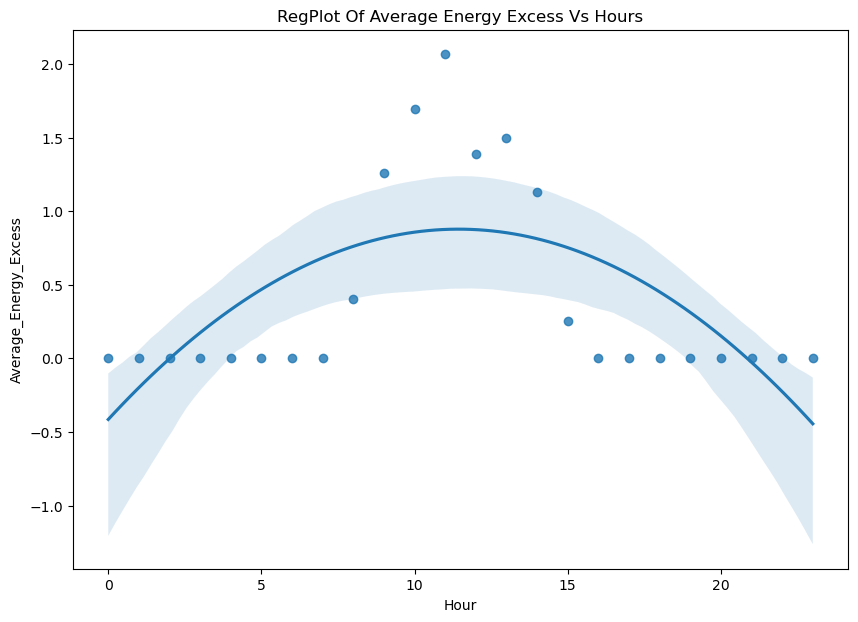

In [21]:
fig = plt.figure(figsize=(10,7))
sns.regplot(y=Average_Energy_Excess,x=df['Hour'].unique(),order=2)
plt.xlabel('Hour')
plt.ylabel('Average_Energy_Excess')
plt.title('RegPlot Of Average Energy Excess Vs Hours');

Obtain the pearson Coefficient to know the impact of changes

In [22]:
from scipy import stats
Pearson_coef,P_value = stats.pearsonr(df['Electricity usage (kWh)'].groupby(df['Hour']).mean(),Ave_Solar_Gen)
print(f' The Pearson Coeffiecient for the above relationship is {Pearson_coef} and the P_Value is {P_value}')

 The Pearson Coeffiecient for the above relationship is -0.17037427606017294 and the P_Value is 0.42606227791060824


In [23]:
Pearson_coef,P_value = stats.pearsonr(Ave_Elec_Used,df['Hour'].unique())
print(f' The Pearson Coeffiecient for the above relationship is {Pearson_coef} and the P_Value is {P_value}')

 The Pearson Coeffiecient for the above relationship is 0.6729658679235592 and the P_Value is 0.000313985214581123


In [24]:
Pearson_coef,P_value = stats.pearsonr(df['Hour'].unique(),Ave_Solar_Gen)
print(f' The Pearson Coeffiecient for the above relationship is {Pearson_coef} and the P_Value is {P_value}')

 The Pearson Coeffiecient for the above relationship is -0.04531637928895178 and the P_Value is 0.8334645891364016


## Modelling

In [25]:
df.head()

,Hour,Solar electricity generation (kWh),Electricity usage (kWh),Date,Bought Electricity
0,0,0.0,1.509849,2020-01-01,1.509849
1,1,0.0,1.411859,2020-01-01,1.411859
2,2,0.0,1.023898,2020-01-01,1.023898
3,3,0.0,0.642000,2020-01-01,0.642000
4,4,0.0,0.960000,2020-01-01,0.960000


In [26]:
df.Date = df.Date.astype(str)

In [27]:
for record in range(len(df)):
    if (df['Date'][record] == '2020-01-01' and df['Hour'][record]== 0):
        df['Bat_charge']= 0
    else:
        if record>0:
            df['Bat_charge'][record] = df['Bat_charge'][record-1]+df['Solar electricity generation (kWh)'][record]-df['Electricity usage (kWh)'][record]
            if df['Bat_charge'][record] < 0:
                df['Bat_charge'][record] = 0
            elif df['Bat_charge'][record]>12.5:
                df['Bat_charge'][record] = 12.5
df.head()

C:\Users\victo\AppData\Local\Temp\ipykernel_9432\3698922118.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bat_charge'][record] = df['Bat_charge'][record-1]+df['Solar electricity generation (kWh)'][record]-df['Electricity usage (kWh)'][record]


,Hour,Solar electricity generation (kWh),Electricity usage (kWh),Date,Bought Electricity,Bat_charge
0,0,0.0,1.509849,2020-01-01,1.509849,0.0
1,1,0.0,1.411859,2020-01-01,1.411859,0.0
2,2,0.0,1.023898,2020-01-01,1.023898,0.0
3,3,0.0,0.642000,2020-01-01,0.642000,0.0
4,4,0.0,0.960000,2020-01-01,0.960000,0.0


In [28]:
# Inspect for Battery charge above the maximum limit od 12.5
df[df['Bat_charge']>12.5].value_counts()

Series([], dtype: int64)

In [29]:
# Inspect for Battery charge below the minimum limit of 0
df[df['Bat_charge']<0].value_counts()

Series([], dtype: int64)

In [30]:
df['Bat_charge'].value_counts()

0.0000     4779
12.5000    1093
0.7620        4
0.1560        4
0.2400        4
           ... 
1.3070        1
0.1064        1
2.9820        1
7.9950        1
1.1250        1
Name: Bat_charge, Length: 2693, dtype: int64

In [31]:
for records in range(len(df)):
    if records>0:
        df['Battery_electricity_bought'][records] = df['Bought Electricity'][records]-df['Bat_charge'][records-1]
        if df['Battery_electricity_bought'][records] < 0:
                df['Battery_electricity_bought'][records]= 0
    else:
        df['Battery_electricity_bought']= df['Bought Electricity'][records]


df.head(80)

C:\Users\victo\AppData\Local\Temp\ipykernel_9432\671254411.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Battery_electricity_bought'][records] = df['Bought Electricity'][records]-df['Bat_charge'][records-1]
C:\Users\victo\AppData\Local\Temp\ipykernel_9432\671254411.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Battery_electricity_bought'][records]= 0


,Hour,Solar electricity generation (kWh),Electricity usage (kWh),Date,Bought Electricity,Bat_charge,Battery_electricity_bought
0,0,0.000,1.509849,2020-01-01,1.509849,0.0,1.509849
1,1,0.000,1.411859,2020-01-01,1.411859,0.0,1.411859
2,2,0.000,1.023898,2020-01-01,1.023898,0.0,1.023898
3,3,0.000,0.642000,2020-01-01,0.642000,0.0,0.642000
4,4,0.000,0.960000,2020-01-01,0.960000,0.0,0.960000
...,...,...,...,...,...,...,...
75,3,0.000,0.189000,2020-01-04,0.189000,0.0,0.189000
76,4,0.000,0.195000,2020-01-04,0.195000,0.0,0.195000
77,5,0.009,0.477000,2020-01-04,0.468000,0.0,0.468000
78,6,0.009,0.228000,2020-01-04,0.219000,0.0,0.219000


In [32]:
for records in range(len(df)):
    if records>0:
        df['Saving by battery'][records]= (df['Battery_electricity_bought'][records] - df['Bought Electricity'][records])*0.17
    else:
        df['Saving by battery']= (df['Battery_electricity_bought'][records] - df['Bought Electricity'][records])*0.17 - 7000
df.head()

C:\Users\victo\AppData\Local\Temp\ipykernel_9432\1495046505.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Saving by battery'][records]= (df['Battery_electricity_bought'][records] - df['Bought Electricity'][records])*0.17


,Hour,Solar electricity generation (kWh),Electricity usage (kWh),Date,Bought Electricity,Bat_charge,Battery_electricity_bought,Saving by battery
0,0,0.0,1.509849,2020-01-01,1.509849,0.0,1.509849,-7000.0
1,1,0.0,1.411859,2020-01-01,1.411859,0.0,1.411859,0.0
2,2,0.0,1.023898,2020-01-01,1.023898,0.0,1.023898,0.0
3,3,0.0,0.642000,2020-01-01,0.642000,0.0,0.642000,0.0
4,4,0.0,0.960000,2020-01-01,0.960000,0.0,0.960000,0.0


In [33]:
df.Date.dtype

dtype('O')

In [34]:
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')
df2 = df.groupby(pd.Grouper(key='Date', freq='m')).sum()
df2.head()

,Hour,Solar electricity generation (kWh),Electricity usage (kWh),Bought Electricity,Bat_charge,Battery_electricity_bought,Saving by battery
Date,,,,,,,
2020-01-31,8556,266.259,1767.193718,1643.776718,659.782400,1511.651718,-7022.461250
2020-02-29,7728,449.634,1559.929310,1392.808310,1206.374600,1190.911310,-34.322490
2020-03-31,8556,602.451,1797.859450,1619.011450,1604.424023,1384.846450,-39.808050
2020-04-30,8280,915.132,1726.356487,1460.504519,2246.791213,1144.120799,-53.785232
2020-05-31,8556,1641.360,946.317809,717.333809,4759.129844,339.930493,-64.158564


# Visuals to show the monthly trend for the year 2020

<Axes: xlabel='Date'>

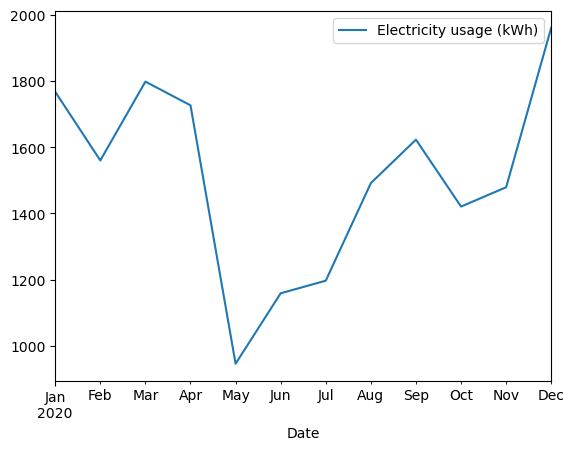

In [35]:
df2.plot(y='Electricity usage (kWh)')

<Axes: xlabel='Date'>

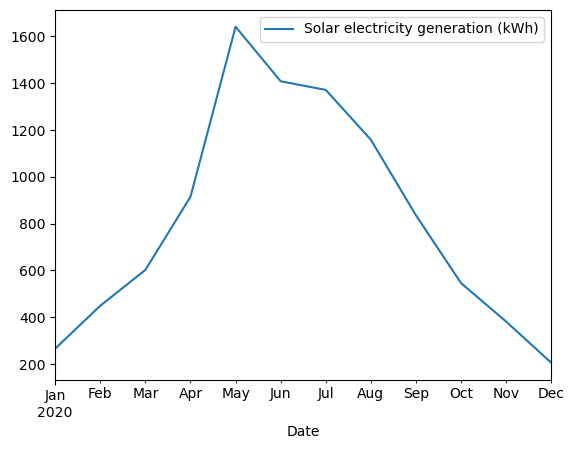

In [ ]:
df2.plot(y='Solar electricity generation (kWh)')

<Axes: xlabel='Date'>

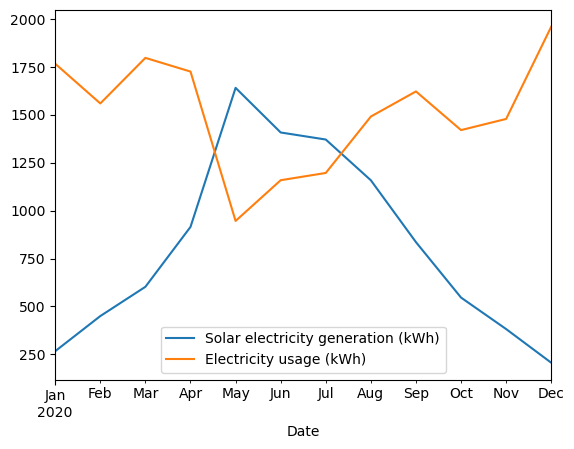

In [39]:
df2.plot(y=['Solar electricity generation (kWh)','Electricity usage (kWh)'])

<Axes: xlabel='Date'>

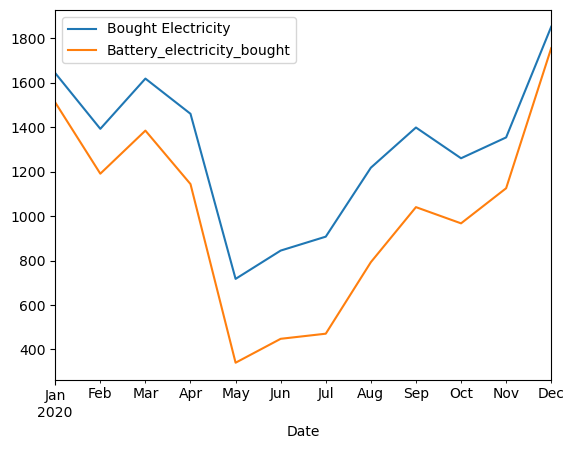

In [37]:
df2.plot(y= ['Bought Electricity', 'Battery_electricity_bought'])

In [38]:
df['Battery_electricity_bought'].min()

0.0